Caculate transition matrices for all relation pairs in training data using co-occurence counts within dialogues. Use +1 smoothing as initial smoothing technique. Save probabilities (full for now, not log) as matrix in pickle. 

In [1]:
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [6]:
with open('../CRECIL/Final_Data/train.json','rb') as infile:
    train_df = json.loads(infile.read())
    
with open('rid_to_rel.pickle','rb') as infile:
    rid_to_rel = pickle.load(infile)

with open('rel_to_rid.pickle','rb') as infile:
    rel_to_rid = pickle.load(infile)

In [4]:
dialog = train_df[0][1]

chars = list(set([rel['x'] for rel in dialog]))

In [8]:
all_rels = [item for item in rel_to_rid.keys()]
len(all_rels)

32

In [9]:
rel_counts = dict()

for i in all_rels:
    for j in all_rels:
        if i not in rel_counts:
            rel_counts[i] = dict()
        if j not in rel_counts[i]:
            rel_counts[i][j] = 0
      

{'per:children': {'per:children': 0,
  'per:spouse': 0,
  'per:parents': 0,
  'unanswerable': 0,
  'per:alternate_name': 0,
  'per:parents-in-law': 0,
  'per:grandparents': 0,
  'per:children-in-law': 0,
  'per:grandchildren': 0,
  'per:nurse': 0,
  'per:friends': 0,
  'per:classmate': 0,
  'per:neighbor': 0,
  'per:acquaintance': 0,
  'per:negative impression': 0,
  'per:ex-girlfriend': 0,
  'per:girlfriend': 0,
  'per:dates': 0,
  'per:ex-boyfriend': 0,
  'per:boyfriend': 0,
  'per:relative': 0,
  'per:siblings': 0,
  'per:positive impression': 0,
  'per:colleague': 0,
  'per:client': 0,
  'per:siblings-in-law': 0,
  'per:subordinate': 0,
  'per:boss': 0,
  'per:student': 0,
  'per:teacher': 0,
  'per:nickname': 0,
  'per:roommate': 0},
 'per:spouse': {'per:children': 0,
  'per:spouse': 0,
  'per:parents': 0,
  'unanswerable': 0,
  'per:alternate_name': 0,
  'per:parents-in-law': 0,
  'per:grandparents': 0,
  'per:children-in-law': 0,
  'per:grandchildren': 0,
  'per:nurse': 0,
  'pe

In [11]:
# 1. Get co-occurence counts


for i in tqdm(range(0,len(train_df))):# range(0,1):
    
    # iterate over list of characters (in x position)
    chars = list(set([rel['x'] for rel in train_df[i][1]]))
    
    for ch in chars:
        all_roles = []
        for j in range(0,len(train_df[i][1])):
            
            if train_df[i][1][j]['x'] ==ch:
                
                rel_list = train_df[i][1][j]['r'] #list of variable length with relation ids (0-31)
                
                for r in rel_list:
                    all_roles.append(r)
                    
        for l in range(0,len(all_roles)):
            for m in range(0,len(all_roles)):
                if l!=m:
                    rel_counts[all_roles[l]][all_roles[m]] +=1
                    

100%|███████████████████████████████████████| 482/482 [00:00<00:00, 3340.31it/s]


In [13]:
rel_counts['per:ex-girlfriend']

{'per:children': 0,
 'per:spouse': 0,
 'per:parents': 0,
 'unanswerable': 205,
 'per:alternate_name': 346,
 'per:parents-in-law': 0,
 'per:grandparents': 0,
 'per:children-in-law': 0,
 'per:grandchildren': 0,
 'per:nurse': 85,
 'per:friends': 206,
 'per:classmate': 66,
 'per:neighbor': 177,
 'per:acquaintance': 0,
 'per:negative impression': 0,
 'per:ex-girlfriend': 296,
 'per:girlfriend': 402,
 'per:dates': 285,
 'per:ex-boyfriend': 0,
 'per:boyfriend': 0,
 'per:relative': 0,
 'per:siblings': 0,
 'per:positive impression': 0,
 'per:colleague': 0,
 'per:client': 0,
 'per:siblings-in-law': 0,
 'per:subordinate': 15,
 'per:boss': 15,
 'per:student': 4,
 'per:teacher': 0,
 'per:nickname': 0,
 'per:roommate': 0}

<BarContainer object of 32 artists>

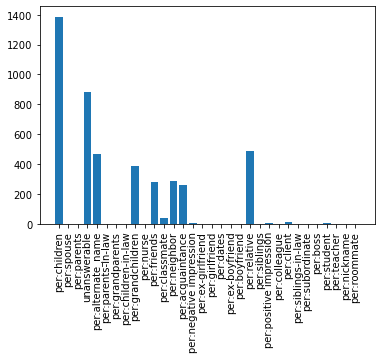

In [14]:
#graph a sorted histogram of decades
plt.xticks(rotation=90)
plt.bar(rel_counts['per:grandchildren'].keys(),rel_counts['per:grandchildren'].values())


In [15]:
# 2. Smooth counts +1
all_rels = list(all_rels)
for i in range(0,len(all_rels)):
    for j in range(0,len(all_rels)):
        rel_counts[all_rels[i]][all_rels[j]] += 1

In [16]:
# 3. Convert to probabilities - if you do this right... what exactly sums to 1?
rel_probs = dict()
for i in range(0,len(all_rels)):
    rel_probs[all_rels[i]] = dict()
    total = 0
    
    for j in range(0,len(all_rels)):
        total += rel_counts[all_rels[i]][all_rels[j]]
    
    prob_total = 0.0
    for j in range(0,len(all_rels)):
        rel_probs[all_rels[i]][all_rels[j]] = rel_counts[all_rels[i]][all_rels[j]]/total
        prob_total += rel_probs[all_rels[i]][all_rels[j]]
    print(f'{all_rels[i]} = {prob_total}')

per:children = 1.0000000000000007
per:spouse = 1.0000000000000009
per:parents = 0.9999999999999994
unanswerable = 0.9999999999999999
per:alternate_name = 0.9999999999999997
per:parents-in-law = 0.9999999999999996
per:grandparents = 0.9999999999999998
per:children-in-law = 0.9999999999999999
per:grandchildren = 0.9999999999999999
per:nurse = 1.0000000000000002
per:friends = 1.0000000000000002
per:classmate = 1.0000000000000004
per:neighbor = 1.0000000000000002
per:acquaintance = 1.0
per:negative impression = 1.0000000000000004
per:ex-girlfriend = 1.0000000000000007
per:girlfriend = 1.0000000000000002
per:dates = 1.0000000000000004
per:ex-boyfriend = 0.9999999999999994
per:boyfriend = 0.9999999999999996
per:relative = 1.0000000000000002
per:siblings = 1.0000000000000002
per:positive impression = 0.9999999999999993
per:colleague = 1.0000000000000002
per:client = 0.9999999999999999
per:siblings-in-law = 1.0000000000000004
per:subordinate = 1.0
per:boss = 1.0000000000000004
per:student = 1.

In [17]:
rel_probs

{'per:children': {'per:children': 0.19672365350730986,
  'per:spouse': 0.041763893518738986,
  'per:parents': 0.029287108909948092,
  'unanswerable': 0.20215248345159292,
  'per:alternate_name': 0.11748178484689747,
  'per:parents-in-law': 4.7621315300728604e-05,
  'per:grandparents': 4.7621315300728604e-05,
  'per:children-in-law': 0.007476546502214391,
  'per:grandchildren': 0.0660983856374113,
  'per:nurse': 4.7621315300728604e-05,
  'per:friends': 0.03966855564550693,
  'per:classmate': 0.007809895709319491,
  'per:neighbor': 0.052335825515500735,
  'per:acquaintance': 0.04857374160674318,
  'per:negative impression': 0.0007143197295109291,
  'per:ex-girlfriend': 4.7621315300728604e-05,
  'per:girlfriend': 4.7621315300728604e-05,
  'per:dates': 0.001333396828420401,
  'per:ex-boyfriend': 0.00038097052240582883,
  'per:boyfriend': 0.00033334920710510025,
  'per:relative': 0.1093861612457736,
  'per:siblings': 0.05195485499309491,
  'per:positive impression': 0.0020000952426306013,
 

In [18]:
p_matrix = pd.DataFrame(rel_probs).T

<BarContainer object of 32 artists>

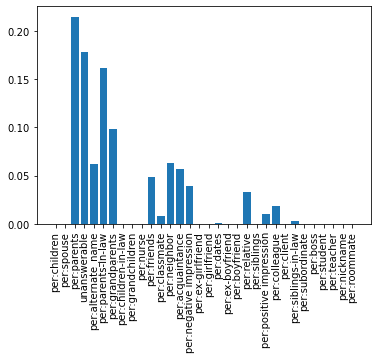

In [19]:
#graph a sorted histogram of decades
plt.xticks(rotation=90)
plt.bar(rel_probs['per:grandparents'].keys(),rel_probs['per:grandparents'].values())


In [20]:
# 4. Save as matrix
with open("ref_files/transition_matrix.pickle",'wb') as outfile:
    pickle.dump(p_matrix,outfile,protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# 4. Save as nested dict
with open("ref_files/transition_nested_dict.pickle",'wb') as outfile:
    pickle.dump(rel_probs,outfile,protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
"""
Make class to eventually save in .py object.
"""
class transition_matrix:
    
    def __init__(self,data:list):
        
        self.